#1.   Download the dataset from your dataset URL.

In [1]:
# Install the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Make a directory named “.kaggle”
!mkdir ~/.kaggle

In [3]:
# Copy the “kaggle.json” into this new directory
!cp kaggle.json ~/.kaggle/

In [4]:
# Allocate the required permission for this file.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the required file
! kaggle competitions download -c sentiment-analysis-of-covid-19-related-tweets

! kaggle datasets download gpreda/covid19-tweets

  0% 0.00/331k [00:00<?, ?B/s]
100% 331k/331k [00:00<00:00, 94.0MB/s]
 75% 21.0M/27.9M [00:00<00:00, 219MB/s]
100% 27.9M/27.9M [00:00<00:00, 236MB/s]


In [6]:
# Unzip all the downloaded files
!unzip sentiment-analysis-of-covid-19-related-tweets.zip
!unzip covid19-tweets.zip

Archive:  sentiment-analysis-of-covid-19-related-tweets.zip
  inflating: training.csv            
  inflating: validation.csv          
Archive:  covid19-tweets.zip
  inflating: covid19_tweets.csv      


#2.   Read external sources for the dataset to understand the schema and data.

In [7]:
!ls -l

total 96840
-rw-r--r-- 1 root root 68713814 Aug 30  2020 covid19_tweets.csv
-rw-r--r-- 1 root root 29305228 Mar 24 04:27 covid19-tweets.zip
-rw-r--r-- 1 root root       66 Mar 24 04:26 kaggle.json
drwxr-xr-x 1 root root     4096 Mar 22 13:39 sample_data
-rw-r--r-- 1 root root   339144 Mar 24 04:27 sentiment-analysis-of-covid-19-related-tweets.zip
-rw-r--r-- 1 root root   530787 May 10  2021 training.csv
-rw-r--r-- 1 root root   260187 May 10  2021 validation.csv


In [8]:
# Read covid19_tweets
!head -n 10 covid19_tweets.csv | column -t -s , 

user_name                                                                    user_location           user_description                                                             user_created                                                                                                                   user_followers       user_friends                                                                                                                                user_favourites      user_verified                                                                                                                            date                 text                                                                                                                                         hashtags                                                                                                                                      source                                                                  

In [9]:
# Read training
!head -n 10 training.csv | column -t -s , 

ID  Tweet                                                                                                               Labels
1   NO JOKE I WILL HOP ON A PLANE RN! (Well after COVID19 lol)                                                          0 10
2   BanMediaHouse whose is responsible for spreading Fake and communal Stories in this pandemic Corona situation.       6
3   Im waiting for someone to say to me that all this corona thing is just an April fools joke                          3 4
4   He is a liar. Proven day night. Time again. Lies when the truth will do. COVID19                                    6
5   "NEW: U.S. CoronaVirus death toll reaches 4                                                                         000 after nearly 900 new deaths were reported today (BNO News) Covid19 CoronaVirusOutbreak"           8
6   "Coronavirus impact Govt extends I-T deadlines related to Sections 80C                                               80D"                               

In [10]:
# Read validation
!head -n 10 validation.csv | column -t -s , 

ID    Tweet
5001  "Forgot to a math test and I was failing but my teacher opening it back up                                maybe corona aint so bad"
5002  Corona effected came from Delhi in Bihar lakhisarai district at Mahisona village his name is pappu Khan
5003  Make CORONA END NA
5004  Imagine if the coronavirus pandemic was a big April fools joke the government pulled on us .....
5005  Howdy Ana. Where can I get married during the coronavirus? Any update from the Gov?
5006  Coronavirus live blog: Allergist and immunologist Dr. Purvi Parikh answers your questions
5007  We won't b talking about corona but about hunger killing pple
5008  Fuck Corona man... I couldve gone on a vacation next week to the states if this shit doesnt exist
5009  "Female-founded companies                                                                                 as a result                 have less cash on hand to carry them through any kind of unexpected event   like COVID19."


#3.   Create a database to store the data, using either SQL or NoSQL.

In [11]:
!sudo apt-get install sqlite3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 860 kB of archives.
After this operation, 2,803 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 sqlite3 amd64 3.31.1-4ubuntu0.5 [860 kB]
Fetched 860 kB in 1s (826 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package sqlite3.
(Reading data

In [12]:
!touch covid19_tweets.db

In [13]:
%load_ext sql

In [14]:
%sql sqlite:///covid19_tweets.db

In [15]:
%%sql

DROP TABLE tweets;

 * sqlite:///covid19_tweets.db
(sqlite3.OperationalError) no such table: tweets
[SQL: DROP TABLE tweets;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


#4.   Insert the data into the database, using either SQL or NoSQL.


In [16]:
# # Create a table to store the CSV data

# %%sql
# CREATE TABLE tweets (
#     id INTEGER PRIMARY KEY AUTOINCREMENT,
#     user_name VARCHAR(255),
#     user_location VARCHAR(255),
#     user_description TEXT,
#     user_created DATETIME,
#     user_followers INT,
#     user_friends INT,
#     user_favourites INT,
#     user_verified BOOLEAN,
#     date DATETIME,
#     text TEXT,
#     hashtags VARCHAR(255),
#     source VARCHAR(255),
#     is_retweet BOOLEAN);

In [17]:
# Create a table to store the CSV data

%%sql
CREATE TABLE tweets (
    user_name VARCHAR(255),
    user_location VARCHAR(255),
    user_description TEXT,
    user_created DATETIME,
    user_followers INT,
    user_friends INT,
    user_favourites INT,
    user_verified BOOLEAN,
    date DATETIME,
    text TEXT,
    hashtags VARCHAR(255),
    source VARCHAR(255),
    is_retweet BOOLEAN);

 * sqlite:///covid19_tweets.db
Done.


[]

In [18]:
!tail -n +2 covid19_tweets.csv > covid19_tweets_noheader.csv # skip header

In [19]:
# !sqlite3 -separator ',' covid19_tweets.db ".mode csv" ".import 'covid19_tweets.csv' tweets"
!sqlite3 -separator ',' covid19_tweets.db ".mode csv" ".import covid19_tweets_noheader.csv tweets"  # import data

In [20]:
# !sqlite3 covid19_tweets.db <<EOF
# !.mode csv
# !.import covid19_tweets.csv mytable
# !EOF

In [21]:
!sqlite3 -separator ',' covid19_tweets.db ".import covid19_tweets.csv tweets"

In [22]:
%%sql

SELECT * from tweets LIMIT 15;


 * sqlite:///covid19_tweets.db
Done.


user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",,Twitter for iPhone,False
Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,,Twitter for Android,False
Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 @kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
🎹 Franz Schubert,Новоро́ссия,"🎼 #Новоро́ссия #Novorossiya #оставайсядома #STAYatHOME Polymath, composer, English.",2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise. It's almost as bad as it ever was. Politicians and businesses want… https://t.co/hXMHooXX2C,"['coronavirus', 'covid19']",Twitter Web App,False
hr bartender,"Gainesville, FL",Workplace tips and advice served up in a friendly place. Corporate blog of @ITMGroup by @Sharlyn_Lauby. Cheers!,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK","['COVID19', 'Recruiting']",Buffer,False
Derbyshire LPC,,,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy… https://t.co/OSu5Q4kdd7,,TweetDeck,False
Prathamesh Bendre,,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @ChouhanShivraj .#covid19#covidPositive,"['covid19', 'covidPositive']",Twitter for Android,False
Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & all the members of the body, though many, are one body, so it is with Christ. 1 Corinthians 12:12",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at https://t.co/7X5RTyKVji #HurricaneHanna #COVID19… https://t.co/06dZcGUnwL,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


#5.   Connect to the database using Python and retrieve the data from the tables, using either SQL or NoSQL.



In [23]:
import sqlite3
import csv
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:


# Connect to the database
conn = sqlite3.connect('covid19_tweets.db')

# Create a cursor object
cursor = conn.cursor()

In [25]:
# Create a table to store the CSV data
create_table_query = '''
    CREATE TABLE training_tweets (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Tweet TEXT,
    Labels VARCHAR(255)
);
'''
cursor.execute(create_table_query)

In [26]:

# Execute the SQL command to insert data from CSV file
with open('training.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip header row
    for row in reader:
        cursor.execute('INSERT INTO training_tweets (id, Tweet, Labels) VALUES (?, ?, ?)', row)

# Commit the changes
conn.commit()

In [27]:
# Filtering the Optimistic (1) labeling training data
cursor = conn.execute("SELECT * from training_tweets WHERE Labels=1")
for row in cursor:
    print(row)
rows = cursor.fetchmany(10)
# Close the connection to the database


(343, 'Shout out to !!! I truly respect the way youre leading NY through this crisis!!! COVID19', '1')
(453, "I'll say it again, good work ! This is LEADERSHIP in the MEDIA!! MembersOfThePressWTF COVID19 VoteBlue2020", '1')
(581, 'Thank you so much for this UAE! indeed an answered prayer coronavirus Covid_19', '1')
(582, 'My mentor is out there fighting coronavirus in Detroit hospitals and I dont think Ive ever been prouder', '1')
(711, 'Three teams are fighting Covid19 day night: 1: Doctors, Nurses, Health Officials. 2: Modis PR team. 3: IT cell', '1')
(715, 'thanks to and for a brilliant zoom on covid19 emergency payment and tax and everything x', '1')
(1094, 'Thank you and G42! An impressive feat! Coronavirus diagnostics are ramped up in the UAE', '1')
(1281, 'When your congressman deploys with the to help fight the coronavirus . Thats leading by example.', '1')
(1356, 'Kylie Jenner to produce and donate hand sanitizer to hospitals battling covid19. Now thats an influencer.', '1')
(

In [28]:
# Retrieve data from the table
cursor = conn.execute("SELECT * from tweets")
rows = cursor.fetchmany(10)
rows

[('ᏉᎥ☻լꂅϮ',
  'astroworld',
  'wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙',
  '2017-05-26 05:46:42',
  624,
  950,
  18775,
  'False',
  '2020-07-25 12:27:21',
  'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0',
  '',
  'Twitter for iPhone',
  'False'),
 ('Tom Basile 🇺🇸',
  'New York, NY',
  'Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP',
  '2009-04-16 20:06:23',
  2253,
  1677,
  24,
  'True',
  '2020-07-25 12:27:17',
  "Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu",
  '',
  'Twitter for Android',
  'False'),
 ('Time4fisticuffs',
  'Pewee Valley, KY',
  '#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #R

#6.   Save the data into a pandas dataframe or other format.

In [29]:
# Define the column data types
# dtypes = {
#     'user_name': 'object',
#     'user_location': 'object',
#     'user_description': 'object',
#     'user_created': 'datetime64',
#     'user_followers': 'int',
#     'user_friends': 'int',
#     'user_favourites': 'int',
#     'user_verified': 'bool',
#     'date': 'datetime64',
#     'text': 'object',
#     'hashtags': 'object',
#     'source': 'object',
#     'is_retweet': 'bool'
# }

# Read the data with data types
tweet_df = pd.read_sql_query('SELECT * FROM tweets', conn)



In [30]:
tweet_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358212,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
358213,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
358214,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,,Twitter Web App,False
358215,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [31]:
class_map = {
    0: "optimistic",
    1: "thankful",
    2: "empathetic",
    3: "pessimistic",
    4: "anxious",
    5: "sad",
    6: "annoyed",
    7: "denial",
    8: "surprise",
    9: "official_report",
    10: "joking"
}

inv_class_map = {
    "optimistic": 0,
    "thankful": 1,
    "empathetic": 2,
    "pessimistic": 3,
    "anxious": 4,
    "sad": 5,
    "annoyed": 6,
    "denial": 7,
    "surprise": 8,
    "official_report": 9,
    "joking": 10
}

In [32]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358217 entries, 0 to 358216
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         358217 non-null  object
 1   user_location     358217 non-null  object
 2   user_description  358217 non-null  object
 3   user_created      358217 non-null  object
 4   user_followers    358217 non-null  object
 5   user_friends      358217 non-null  object
 6   user_favourites   358217 non-null  object
 7   user_verified     358217 non-null  object
 8   date              358217 non-null  object
 9   text              358217 non-null  object
 10  hashtags          358217 non-null  object
 11  source            358217 non-null  object
 12  is_retweet        358217 non-null  object
dtypes: object(13)
memory usage: 35.5+ MB


In [33]:
tweet_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [34]:
# tweet_df.fillna(130, inplace = True)

In [35]:
tweet_df = tweet_df.applymap(lambda x: None if x == '' else x)

<Axes: >

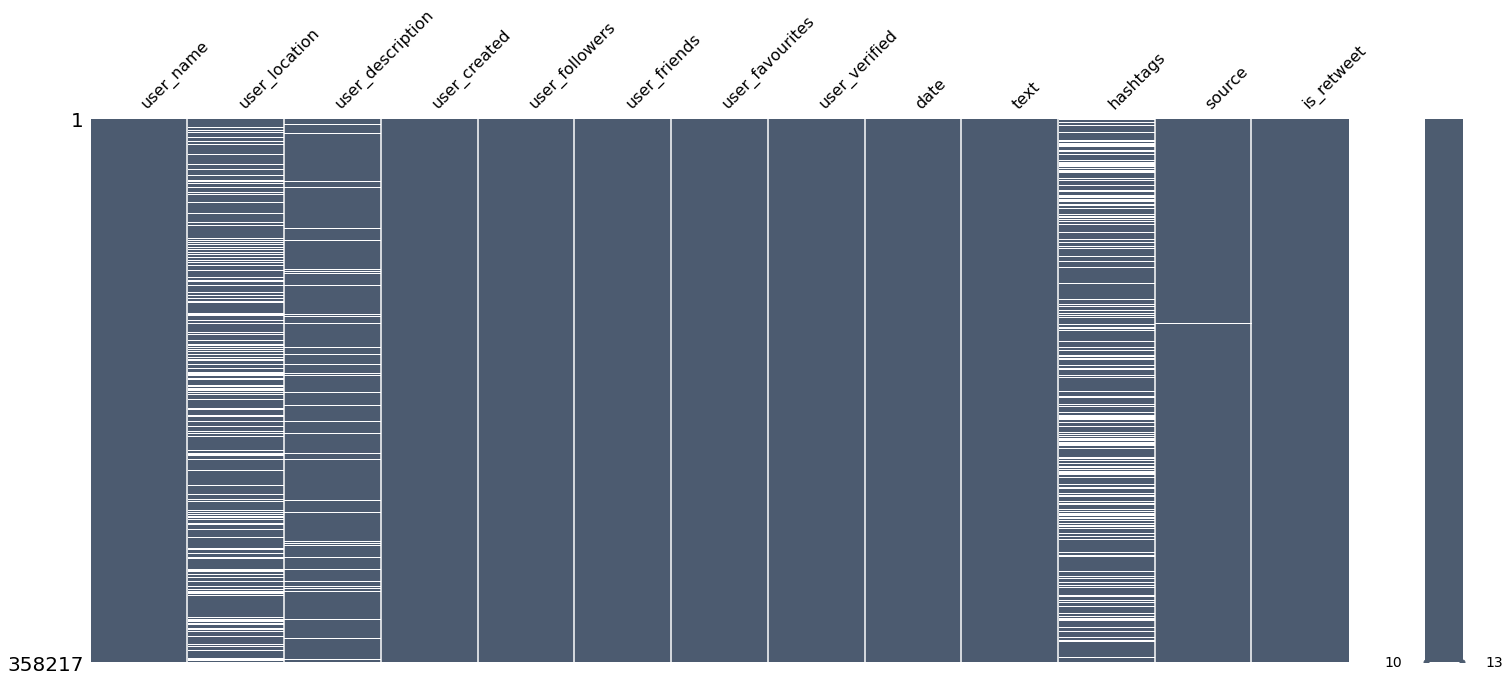

In [36]:
# Missing data as white lines 
import missingno as msno
msno.matrix(tweet_df,color=(0.3,0.36,0.44))

In [37]:
tweet_df.hashtags.isnull().sum()

102668

In [38]:
tweet_df.isnull().sum()

user_name                0
user_location        73542
user_description     20566
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags            102668
source                 154
is_retweet               0
dtype: int64

In [39]:
tweet_df.dropna(subset=['user_location', 'user_description', 'hashtags', 'source', 'text','user_created','date'], inplace=True)

In [40]:
tweet_df.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

In [41]:
tweet_df['user_created'].isnull()
tweet_df[tweet_df['user_created'].isnull()]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet


In [42]:
# tweet_df['user_created'].str.contains('user_created').any()

In [43]:
# convert user_followers column to numeric
tweet_df['user_followers'] = pd.to_numeric(tweet_df['user_followers'], errors='coerce')
tweet_df['user_friends'] = pd.to_numeric(tweet_df['user_friends'], errors='coerce')
tweet_df['user_favourites'] = pd.to_numeric(tweet_df['user_favourites'], errors='coerce')

# convert user_created column to datetime format

tweet_df['user_created'] = pd.to_datetime(tweet_df['user_created'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
tweet_df['date'] = pd.to_datetime(tweet_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [44]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198277 entries, 2 to 358215
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         198277 non-null  object        
 1   user_location     198277 non-null  object        
 2   user_description  198277 non-null  object        
 3   user_created      198276 non-null  datetime64[ns]
 4   user_followers    198276 non-null  float64       
 5   user_friends      198276 non-null  float64       
 6   user_favourites   198276 non-null  float64       
 7   user_verified     198277 non-null  object        
 8   date              198276 non-null  datetime64[ns]
 9   text              198277 non-null  object        
 10  hashtags          198277 non-null  object        
 11  source            198277 non-null  object        
 12  is_retweet        198277 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 2

<Axes: >

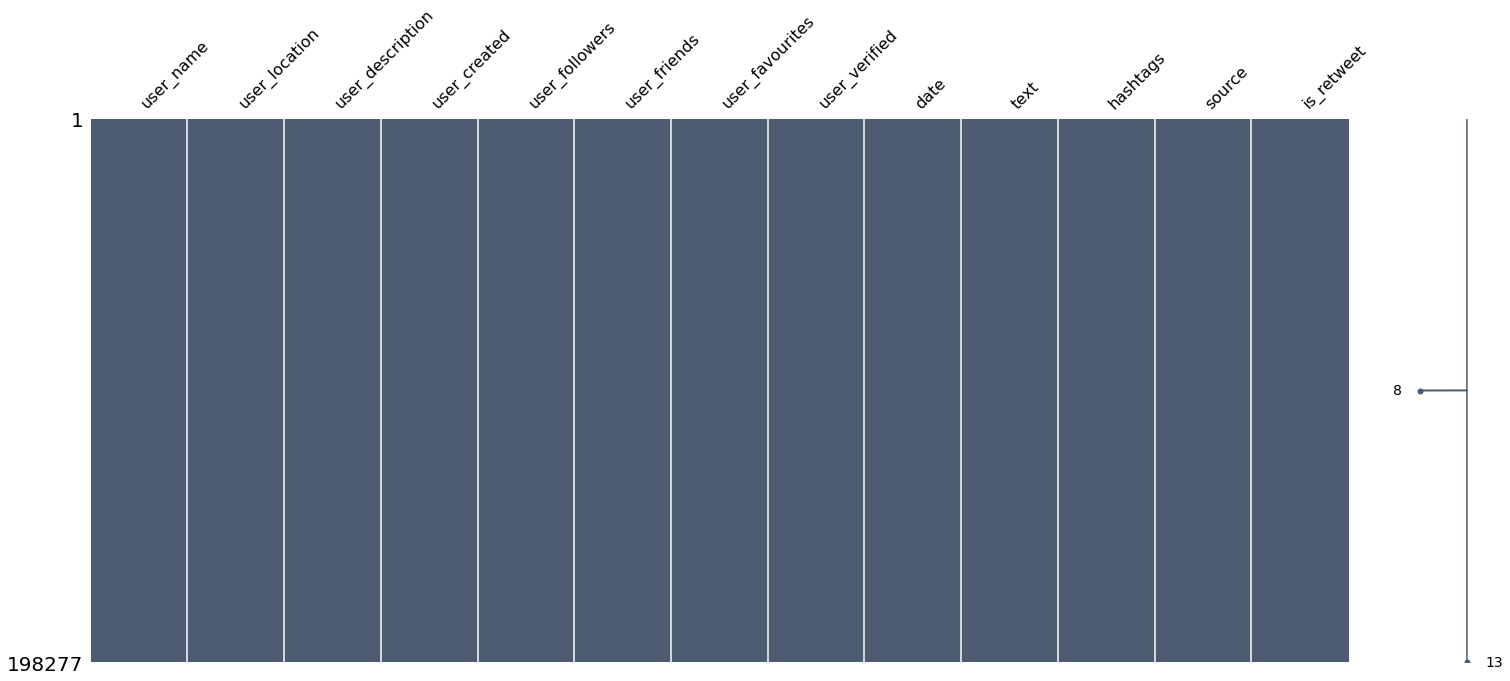

In [45]:
# Missing data as white lines 
import missingno as msno
msno.matrix(tweet_df,color=(0.3,0.36,0.44))

In [46]:
tweet_df.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        1
user_followers      1
user_friends        1
user_favourites     1
user_verified       0
date                1
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

In [47]:
tweet_df.duplicated().sum()

99138

In [48]:
tweet_df.drop_duplicates(inplace=True)

In [49]:
tweet_df.duplicated().sum()

0

In [50]:
training_df = pd.read_sql_query('SELECT * FROM training_tweets', conn)

In [51]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   Tweet   5000 non-null   object
 2   Labels  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [52]:
training_df.head()

,id,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8


In [53]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [54]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [55]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])


In [57]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_text(x))

In [58]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: remove_emoji(x))

In [59]:
tweet_df["text"] = tweet_df['text'].apply(lambda x: remove_stopwords(x))


#7.   Perform exploratory data analysis (EDA) on the data to understand the distribution, trends, and relationships among variables.


In [60]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99139 entries, 2 to 179108
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         99139 non-null  object        
 1   user_location     99139 non-null  object        
 2   user_description  99139 non-null  object        
 3   user_created      99138 non-null  datetime64[ns]
 4   user_followers    99138 non-null  float64       
 5   user_friends      99138 non-null  float64       
 6   user_favourites   99138 non-null  float64       
 7   user_verified     99139 non-null  object        
 8   date              99138 non-null  datetime64[ns]
 9   text              99139 non-null  object        
 10  hashtags          99139 non-null  object        
 11  source            99139 non-null  object        
 12  is_retweet        99139 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 10.6+ MB


In [61]:
pd.DataFrame(tweet_df.dtypes, columns=["type"])

,type
user_name,object
user_location,object
user_description,object
user_created,datetime64[ns]
user_followers,float64
user_friends,float64
user_favourites,float64
user_verified,object
date,datetime64[ns]
text,object


In [62]:
tweet_df.describe().style.background_gradient(cmap=plt.cm.Blues)

,user_followers,user_friends,user_favourites
count,99138.000000,99138.000000,99138.000000
mean,155084.146271,2374.224334,15175.433265
std,1012846.176454,10019.923883,44906.810699
min,0.000000,0.000000,0.000000
25%,322.000000,210.000000,333.000000
50%,1546.000000,666.000000,2184.000000
75%,7576.000000,1951.000000,10384.750000
max,24359165.000000,497363.000000,2047197.000000


In [63]:
# Basic summary statistics of the numerical columns
tweet_df.describe().style.background_gradient(cmap=plt.cm.Blues)

,user_followers,user_friends,user_favourites
count,99138.000000,99138.000000,99138.000000
mean,155084.146271,2374.224334,15175.433265
std,1012846.176454,10019.923883,44906.810699
min,0.000000,0.000000,0.000000
25%,322.000000,210.000000,333.000000
50%,1546.000000,666.000000,2184.000000
75%,7576.000000,1951.000000,10384.750000
max,24359165.000000,497363.000000,2047197.000000


In [64]:
tweet_df.corr().style.background_gradient(cmap=plt.cm.Blues)

,user_followers,user_friends,user_favourites
user_followers,1.000000,-0.011950,-0.038168
user_friends,-0.011950,1.000000,0.179290
user_favourites,-0.038168,0.179290,1.000000


In [65]:
# tweet_df.describe().style.background_gradient(cmap=plt.cm.Reds)

In [66]:
pd.DataFrame(tweet_df.dtypes, columns=["type"])

,type
user_name,object
user_location,object
user_description,object
user_created,datetime64[ns]
user_followers,float64
user_friends,float64
user_favourites,float64
user_verified,object
date,datetime64[ns]
text,object


In [67]:
# Get the list of hashtags from the tweet_df dataframe
hashtag_list = tweet_df["hashtags"]

# Create an empty dictionary to store the total count of each hashtag
total = {}

# Loop through each row in the hashtag_list
for i, items in enumerate(hashtag_list):
    # Check if the item is not null
    if str(items) not in "nan":
        # Remove any unwanted characters from the item string
        items = items.replace('[', '').replace(']', '').replace('"', "").replace("'", "")
        # Split the item string by commas and loop through each hashtag
        for item in items.split(','):
            # Convert the hashtag to lowercase and remove any spaces
            item = item.lower().replace(" ", "")
            # Check if the hashtag already exists in the total dictionary
            if item not in total:
                # If it doesn't exist, add it to the dictionary with a count of 0
                total[item] = 0
            # Increment the count for the current hashtag
            total[item] += 1

# Sort the total dictionary by value in descending order
total = {k: v for k, v in sorted(total.items(), key=lambda item: item[1], reverse=True)}

# Create a new dictionary to store the name and count of each hashtag
df_total_hashtag = {"name": [], "count": []}

# Loop through each hashtag in the total dictionary and append the name and count to the df_total_hashtag dictionary
for x, y in total.items():
    df_total_hashtag["name"].append(x)
    df_total_hashtag["count"].append(y)
    
# Convert the df_total_hashtag dictionary to a pandas dataframe
df_total_hashtag = pd.DataFrame(df_total_hashtag)


In [68]:
print('Top 10 Hashtags List')
df_total_hashtag.head(10)

Top 10 Hashtags List


,name,count
0,covid19,77777
1,coronavirus,6857
2,pandemic,1256
3,covid,973
4,india,972
5,corona,941
6,trump,729
7,lockdown,701
8,odisha,652
9,wearamask,629


In [69]:
# import matplotlib.pyplot as plt

# # count the occurrences of each location
# location_counts = tweet_df['user_location'].value_counts()

# # plot the result as a horizontal bar plot
# location_counts.plot(kind='barh', figsize=(10, 8))

# # set the plot title and axis labels
# plt.title('Count of User Locations')
# plt.xlabel('Count')
# plt.ylabel('Location')

# # display the plot
# plt.show()


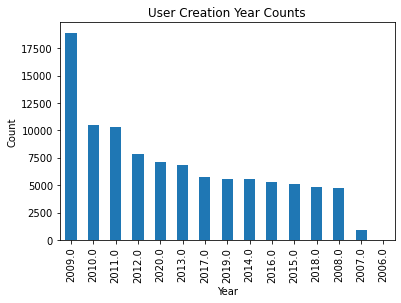

In [70]:
# Extract year from user_created column
# tweet_df['year'] = pd.DatetimeIndex(tweet_df['user_created']).year

# Get the count of unique values for each year
year_counts =  pd.DatetimeIndex(tweet_df['user_created']).year.value_counts()

# Plot the bar chart
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('User Creation Year Counts')
plt.show()

In [71]:
# Get the count of unique values for each year
# year_counts =  pd.DatetimeIndex(tweet_df['date']).year.value_counts()

# # Plot the bar chart
# year_counts.plot(kind='bar')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('Tweet Creation Year Counts')
# plt.show()

In [72]:
# plot_count("user_location", "User location", tweets_df,4)

In [73]:
# tweet_df["user_created"].value_counts().plot.bar(title="Account numbers by created year", figsize=(20, 5), color="blue")

#8.   Visualize the data using matplotlib, seaborn, or other visualization libraries.


<Axes: >

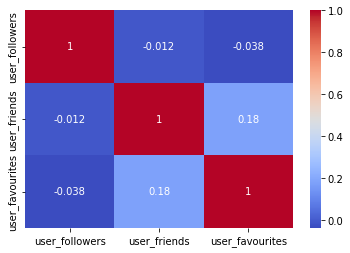

In [74]:
# Generate heatmap
sns.heatmap(tweet_df.corr(), annot=True, cmap='coolwarm')

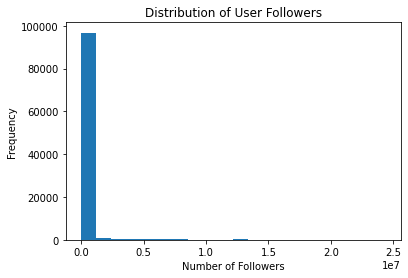

In [75]:
# Histogram of followers
plt.hist(tweet_df['user_followers'], bins=20)
plt.title('Distribution of User Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()


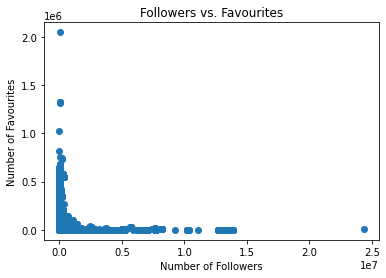

In [76]:
# Scatter plot of followers vs. favourites
plt.scatter(tweet_df['user_followers'], tweet_df['user_favourites'])
plt.title('Followers vs. Favourites')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Favourites')
plt.show()


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-

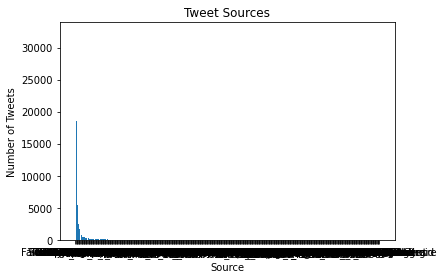

In [77]:
# Bar chart of tweet sources
source_counts = tweet_df['source'].value_counts()
plt.bar(source_counts.index, source_counts.values)
plt.title('Tweet Sources')
plt.xlabel('Source')
plt.ylabel('Number of Tweets')
plt.show()

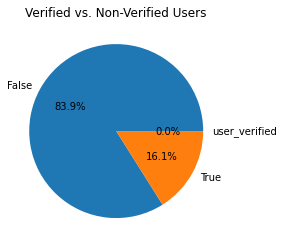

In [78]:
# Pie chart of verified vs. non-verified users
verified_counts = tweet_df['user_verified'].value_counts()
plt.pie(verified_counts.values, labels=verified_counts.index, autopct='%1.1f%%')
plt.title('Verified vs. Non-Verified Users')
plt.show()


In [79]:
# tag_counts = tweet_df[['user_created']].copy()
# tag_counts['year'] = pd.DatetimeIndex(tag_counts['user_created']).year
# tag_counts = pd.concat([tag_counts, tweet_df['hashtags'].str.split(', ').explode().reset_index(drop=True)], axis=1)
# tag_counts = tag_counts.groupby(['year', 'hashtags']).agg(count=('hashtags', 'count')).reset_index()

# # Pivot table to show tag counts by year
# tag_counts_pivot = tag_counts.pivot(index='year', columns='hashtags', values='count').fillna(0)
# # Plot the pivot table
# tag_counts_pivot.plot(kind='line', figsize=(10, 6))

# # Add title and axis labels
# plt.title('Hashtag Usage by Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Hashtags')

# # Show the plot
# plt.show()

In [80]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.figure_factory as ff
from collections import Counter

In [81]:
sorted_tweets = tweet_df[['user_name','text','user_followers','user_favourites']].sort_values(by='user_followers',ascending = False)

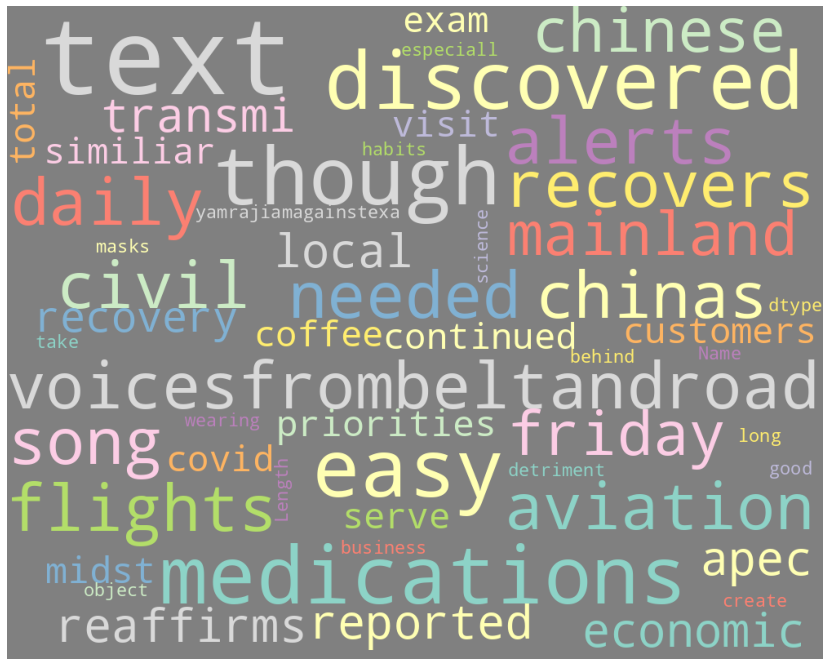

In [82]:
wordcloud = WordCloud(background_color = 'gray',
                     stopwords = stop_words,
                     width = 1000,
                     height = 800,
                     max_words = 200,
                     colormap='Set3',
                     min_word_length = 4,
                     margin = 0,
                     max_font_size = 130,
                     random_state = 42,
                     ).generate(str(sorted_tweets['text']))
print(wordcloud)
plt.figure(figsize = (20,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [83]:
# hashtags = {item.lower().replace(" ", ""): sum([1 for items in tweet_df["hashtags"] if item in str(items)]) for item in set([item.strip() for sublist in tweet_df["hashtags"].dropna() for item in sublist.replace('[', '').replace(']', '').replace('"', '').split(",")])}


In [84]:
# Get the value counts of hashtags
# hashtags = tweet_df['hashtags'].str.split(',', expand=True).stack().str.strip().value_counts()
# hashtags = tweet_df['hashtags'].str.split(',', expand=True).stack().str.strip().value_counts()

# Plot the value counts of each hashtag
# fig, ax = plt.subplots(figsize=(10, 6))
# hashtags.plot(kind='bar', ax=ax)
# ax.set_xlabel('Hashtag')
# ax.set_ylabel('Count')
# plt.show()

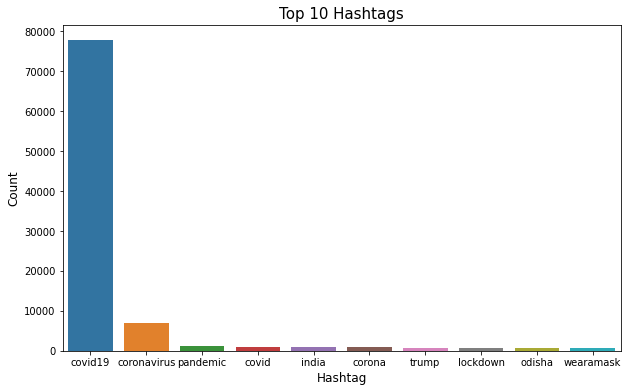

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_hashtag.head(10), x='name', y='count')
plt.title('Top 10 Hashtags', fontsize=15)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [86]:
# aux = df_total_hashtag.head(10)
# aux.plot.bar(x='name', y='count', rot=0, figsize=(20, 5), title="Hashtag count")

# fig, ax = plt.subplots(figsize=(10, 6))
# df_total_hashtag.plot(kind='bar', ax=ax)
# ax.set_xlabel('Hashtag')
# ax.set_ylabel('Count')
# plt.show()

In [87]:


import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

#9.   Apply data analysis techniques like sentiment analysis, topic modeling, or network analysis to draw insights from the data and write your evaluation about the results.
#10.   Write the results back to the database.

In [88]:
# from sklearn.preprocessing import MinMaxScaler

# # Select numerical columns
# num_cols = ['user_followers', 'user_friends', 'user_favourites']

# # Apply MinMaxScaler
# scaler = MinMaxScaler()
# tweet_df[num_cols] = scaler.fit_transform(tweet_df[num_cols])


In [89]:
# tweet_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,0.000381,0.019151,0.003543,False,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claimed ho...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,0.000008,0.001984,0.000727,False,2020-07-25 12:27:10,brookbanktv one gift give appreciation simple ...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,0.004147,0.000338,0.000049,False,2020-07-25 12:27:08,july media bulletin novel coronavirusupdates d...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,0.000048,0.002153,0.000629,False,2020-07-25 12:27:06,coronavirus deaths continue rise almost bad ev...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,0.003282,0.110201,0.001857,False,2020-07-25 12:27:03,change work general recruiting specifically vi...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,0.000010,0.000322,0.000306,False,2020-08-29 19:44:23,reached cases worldwide oof,['covid19'],Twitter Web App,False
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,0.000017,0.003235,0.000519,False,2020-08-29 19:44:21,thanks iamohmai nominating wearamask challenge...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,0.000006,0.000366,0.003563,False,2020-08-29 19:44:16,year insanity lol,['COVID19'],Twitter for Android,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,0.000055,0.002234,0.000000,False,2020-08-29 19:44:14,students test positive major university abc news,['COVID19'],Twitter for iPhone,False


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [91]:
# Load the data
df_train = training_df
df_test = tweet_df

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train['Tweet'], df_train['Labels'], test_size=0.2, random_state=42)

# Transform the text data into numerical feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(df_test['text'])

# Train a Naive Bayes classifier on the training set and evaluate on the validation set
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_val_vec)
print(classification_report(y_val, y_pred, labels=np.unique(y_pred), zero_division=1))

# # Train a logistic regression classifier on the training set and evaluate on the validation set
# clf = LogisticRegression(max_iter=1000)
# clf.fit(X_train_vec, y_train)
# y_pred = clf.predict(X_val_vec)
# print(classification_report(y_val, y_pred, labels=np.unique(y_pred), zero_division=1))

# Make predictions on the test set and save the results to a CSV file
df_test['Labels'] = clf.predict(X_test_vec)
df_test['Labels'] = df_test['Labels'].apply(lambda x: ','.join([class_map[int(i)] for i in x.split()]))
df_test.to_csv('test_results.csv', index=False)
df_test


              precision    recall  f1-score   support

           0       0.33      0.09      0.14        33
         0 1       0.00      0.00      0.00        14
        0 10       0.06      0.12      0.08        49
          10       0.14      0.81      0.24        94
         4 5       1.00      0.07      0.13        14
         5 6       0.00      0.00      0.00        31
           6       0.10      0.47      0.17        49
        6 10       0.06      0.04      0.05        69
           8       0.57      0.93      0.70        42

   micro avg       0.15      0.38      0.22       395
   macro avg       0.25      0.28      0.17       395
weighted avg       0.19      0.38      0.19       395



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Labels
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,0.000381,0.019151,0.003543,False,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claimed ho...,['COVID19'],Twitter for Android,False,annoyed
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,0.000008,0.001984,0.000727,False,2020-07-25 12:27:10,brookbanktv one gift give appreciation simple ...,['COVID19'],Twitter for iPhone,False,joking
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,0.004147,0.000338,0.000049,False,2020-07-25 12:27:08,july media bulletin novel coronavirusupdates d...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"annoyed,denial"
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,0.000048,0.002153,0.000629,False,2020-07-25 12:27:06,coronavirus deaths continue rise almost bad ev...,"['coronavirus', 'covid19']",Twitter Web App,False,annoyed
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,0.003282,0.110201,0.001857,False,2020-07-25 12:27:03,change work general recruiting specifically vi...,"['COVID19', 'Recruiting']",Buffer,False,"annoyed,joking"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,0.000010,0.000322,0.000306,False,2020-08-29 19:44:23,reached cases worldwide oof,['covid19'],Twitter Web App,False,surprise
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,0.000017,0.003235,0.000519,False,2020-08-29 19:44:21,thanks iamohmai nominating wearamask challenge...,['WearAMask'],Twitter for Android,False,joking
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,0.000006,0.000366,0.003563,False,2020-08-29 19:44:16,year insanity lol,['COVID19'],Twitter for Android,False,joking
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,0.000055,0.002234,0.000000,False,2020-08-29 19:44:14,students test positive major university abc news,['COVID19'],Twitter for iPhone,False,surprise


Precision, recall, and F1-score averages for all labels are provided by the macro average. In this instance, 0.25, 0.28, and 0.17 are the macro averages for F1-score, recall, and accuracy. This indicates that not all labels are being handled correctly by the classifier, especially those with little support.

The classifier clearly has trouble properly identifying the bulk of the labels when examining the performance of each individual label. The classifier has a precision and recall of 0.0, for instance, for the label "0 1," which stands for the union of labels 0 and 1. Similar to label "4," which stands for the union of labels 4 and 5, the classifier has excellent precision but a very poor recall for label "4."

In [92]:
# assuming y_pred and y_true are the predicted and true labels, respectively
# Calculate accuracy score
acc_score = accuracy_score(y_val, y_pred)
print(f"Accuracy score: {acc_score:.4f}")


Accuracy score: 0.1510


The model appears to be underperforming with an accuracy score of 0.1510. There are a number of potential causes for this, including a lack of data, an inadequate model's level of complexity, a bad choice of features, or the presence of data noise. The problem has to be further investigated, and the model needs to be adjusted.

In [93]:
conn.commit()
conn.close()

In [ ]:
# Split the data into training and testing sets
train, test = train_test_split(tweet_df, test_size=0.2)

# Extract features from the text data using the CountVectorizer
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train['text'])
test_features = vectorizer.transform(test['text'])

# Train a logistic regression model on the training set
clf = LogisticRegression()
clf.fit(train_features, train['Labels'])

# Evaluate the model on the testing set
y_pred = clf.predict(test_features)
print(classification_report(test['Labels'], y_pred))


In [ ]:
# nltk.download('stopwords')

In [ ]:
# RANDOM_SEED = 42
# CLASSIFIER_THRESHOLD = 0.4

# np.random.seed(RANDOM_SEED)

In [ ]:
# records = []
# with open('training.csv') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
#             line_count += 1
#         else:
#             current_classes = []
#             classes = list(map(int, row[2].split(" ")))
#             for i in range(0, 11):
#                 if i in classes:
#                     current_classes.append(class_map[i])

#             records.append((row[0], row[1], current_classes))
#             line_count += 1

#     print(f'Processed {line_count} lines.')

# training_df = pd.DataFrame.from_records(records, columns=["id", "text", "labels"])

# df = pd.DataFrame.from_records(records, columns=["id", "text", "labels"])

# #trainDataset, testDataset = spark.read.parquet("training_sparknlp.parquet").randomSplit([0.9, 0.1], seed=RANDOM_SEED)
# trainDataset, testDataset = spark.createDataFrame(df).randomSplit([0.9, 0.1], seed=RANDOM_SEED)

# #df.to_parquet("training_sparknlp.parquet", compression="gzip")
# df.info()

In [ ]:
training_df.head(2)

In [ ]:
# tweet_df_filepath = "covid19_tweets.csv"

# training_df = pd.read_csv("training.csv")
# tweet_df = pd.read_csv(tweet_df_filepath)

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# tweet_df.loc[tweet_df.hashtags.isna()]['text'].apply(lambda x : extract_hash_tags(x))

In [ ]:
def extract_hash_tags(s):
    hashes = re.findall(r"#(\w+)", s)
    if hashes:
      return " ".join(hashes)
    else:
      return None
tweet_df['new_hashtags'] = tweet_df['text'].apply(lambda x : extract_hash_tags(x))

In [ ]:
tweet_df.hashtags.isnull().sum()

In [ ]:
tweet_df

In [ ]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [ ]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
    

In [ ]:
import re


def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [ ]:
tweet_df.text = tweet_df.text.apply(lambda x: preprocess(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_text(x))
tweet_df['text'] = tweet_df['text'].apply(lambda x: remove_emoji(x))


In [ ]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: remove_emoji(x))


In [ ]:
tweet_df

In [ ]:
df_train

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df_train = pd.read_csv('training.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['Tweet'], df_train['Labels'], test_size=0.2, random_state=42)

# Convert the text data to numerical features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on the training data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the accuracy and other metrics of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


In [ ]:
train_data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the data
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('validation.csv')

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train['Tweet'], df_train['Labels'], test_size=0.2, random_state=42)

# Transform the text data into numerical feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(df_test['Tweet'])

# Train a Naive Bayes classifier on the training set and evaluate on the validation set
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_val_vec)
print(classification_report(y_val, y_pred))

# Make predictions on the test set and save the results to a CSV file
df_test['Labels'] = clf.predict(X_test_vec)
df_test.to_csv('test_results.csv', index=False)


In [ ]:
df_test.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the data
df_train = pd.read_csv('training.csv')
df_test = tweet_df

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train['Tweet'], df_train['Labels'], test_size=0.2, random_state=42)

# Transform the text data into numerical feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(df_test['text'])

# Train a Naive Bayes classifier on the training set and evaluate on the validation set
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_val_vec)
print(classification_report(y_val, y_pred))

# Make predictions on the test set and save the results to a CSV file
df_test['Labels'] = clf.predict(X_test_vec)
df_test.to_csv('test_results.csv', index=False)


In [ ]:
df_test

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Load the training data
train_data = pd.read_csv('training.csv')

# Split the data into features and labels
train_texts = train_data['Tweet'].values
train_labels = train_data['Labels'].values

# Tokenize the training texts
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

# Convert the texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)

# Pad the sequences to have the same length
train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_padded, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Load the validation data
val_data = pd.read_csv('validation.csv')

# Split the data into features and labels
val_texts = val_data['Tweet text'].values

# Tokenize the validation texts
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Pad the sequences to have the same length
val_padded = pad_sequences(val_sequences, maxlen=100, padding='post', truncating='post')

# Make predictions on the validation data
predictions = model.predict(val_padded)

# Print the predicted labels for the first 10 tweets
print(predictions[:10])
